In [1]:
import numpy as np

1) Find $N(a)$ s.t. 

$P(x|a) = N(a) a^{(-x^2/2)}$

is appropriately normalized.

$\int_{-\infty}^{\infty} N(a)a^{(-x^2/2)} dx = 1$

$\rightarrow N(a) \int_{-\infty}^{\infty} a^{-x^2/2}dx = 1$

$\rightarrow N(a) = [\int_{-\infty}^{\infty} a^{-x^2/2}dx]^{-1}$

$\boxed{\rightarrow N(a) = \sqrt{\frac{\ln(a)}{2\pi}}}$

3) Use Bayes's Thm. to calculate $P(a|{x})$ when one has multiple samples drawn, ie ${x} = (x_1,x_2,x_3,...,x_n)$.

Bayes's Thm:

\begin{equation}
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
\end{equation}


Or, in our terms, 

$$P(a|\vec{x}) = \frac{P(\vec{x}|a)P(a)}{P(\vec{x})}$$

Critically, $P(x|a)\neq P(\vec{x}|a)$. So far, we have:

$$P(x|a) = \sqrt{\frac{\ln(a)}{2\pi}} a^{(-x^2/2)}$$

Since $x$ is generated by a "pure noise" Guassian, though, (sample independence):

$$P(\vec{x}|a)=\prod_{i=1}^n P(x_i|a) = N^n(a)a^{-\sum_i x_i^2/2}$$



Taking $P(a)$ to be uniform, and lazily letting $B$ be a normalization constant, we can write:
$$P(a|\vec{x}) = B\frac{N^n(a)a^{-\sum_i x_i^2/2}}{P(\vec{x})}$$

Finally, I won't bother with explicitly normalizing $P(a|\vec{x})$ with respect to $a$, so I can absorb $P(\vec{x})$ into $B$, too:

$$P(a|\vec{x}) = BN^n(a)a^{-\sum_i x_i^2/2}$$

Which, referring to our previously-calculated factor N, is
$$P(a|\vec{x}) = B{\sqrt{\frac{\ln(a)}{2\pi}}}^na^{-\sum_i x_i^2/2}$$

Absorbing constants:

$$\boxed{P(a|\vec{x}) = B\sqrt{{\ln(a)}^{n} a^{-\sum_i x_i^2}}}$$

4) Draw 100 samples and plot the resulting $P(a|x)$.

Okeydokey, I'll take 1000 values of a in some range and plot the function above:

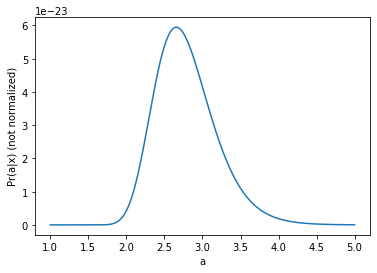

In [8]:
from numpy.random import normal 
from matplotlib import pyplot as plt


def plot_pr_a_given_vecx(vecx,a_range_to_plot):
    #constants
    n = len(vecx)
    sum_x_squared = sum([x**2 for x in vecx])
    
    #gathering values for P(a|x) for multiple values of a
    lna_to_the_n = [np.log(a)**n for a in a_range_to_plot]
    a_exponentiated = [a**-sum_x_squared for a in a_range_to_plot]
    p_values = [np.sqrt(term1*term2) for term1, term2 in zip(lna_to_the_n,a_exponentiated)]
    
    plt.plot(a_range_to_plot,p_values)
    plt.xlabel('a')
    plt.ylabel('Pr(a|x) (not normalized)')
    plt.show()

n_samples = 100
min_a = 1
max_a = 5

samples = [normal() for i in range(n_samples)]
range_for_a = np.linspace(min_a,max_a,1000)
plot_pr_a_given_vecx(samples,range_for_a)

Not too shabby!

5) Use the Metropolis-Hasting algorithm to sample from the posterior density and create a Markov chain.

I'll start from an initial guess of a = 2.5. I'll eyeball it and choose a standard deviation of .3 for my generating function, which will be Gaussian.

In [9]:
from numpy.random import random

def pr_a_given_vecx(vecx,a):
    n = len(vecx)
    sum_x_squared = sum([x**2 for x in vecx])
    lna_to_the_n = np.log(a)**n
    a_exponentiated = a**-sum_x_squared
    return np.sqrt(lna_to_the_n*a_exponentiated)

def generate_candidate(last_val,st_dev):
    return normal(last_val,st_dev)

def calculate_acceptance_probability(candidate,last_accepted,samples):
    first_factor = pr_a_given_vecx(samples,candidate)/pr_a_given_vecx(samples,last_accepted)
    second_factor = 1 #by symmetry of Gaussian distributions
    return min(1,first_factor*second_factor)

a_0 = 2.5
t_max = 10000
sigma = .3

t = 0
chain = [a_0]

while t<t_max:
    a_cand = generate_candidate(chain[-1],sigma)
    pr_accept = calculate_acceptance_probability(a_cand,chain[-1],samples)
    if pr_accept > random():
        chain.append(a_cand)
    else:
        chain.append(chain[-1])
    t = t+1 

print('My chain: ')
print(chain)
print('Chain mean: ')
print(np.average(chain))


My chain: 
[2.5, 2.6755926748564844, 2.8704146587200077, 2.956580716040547, 2.992625000794765, 2.6055605869353506, 2.6211280371389885, 2.540817267583649, 2.360484799266158, 2.4417160805231393, 2.0209393473605646, 2.072495678917935, 2.072495678917935, 2.0797766525289556, 2.166616699740961, 2.2193741749148086, 2.414963295103303, 2.542720896470454, 2.8122738063234323, 2.739644279753123, 2.4763563243201654, 2.531749789950569, 2.7879171716894247, 2.7879171716894247, 2.6670073101443057, 2.619464134540804, 2.70633441197701, 3.1985880508003026, 3.145813646755594, 3.145813646755594, 2.864125014130569, 2.9019934624715544, 2.861292590427466, 2.8359219633626536, 2.8359219633626536, 2.389524028577461, 2.646972378157642, 2.389850839811812, 2.389850839811812, 2.389850839811812, 2.606902186007939, 2.4203567226812788, 2.435605472987053, 2.435605472987053, 2.7844731827472686, 2.6687088296235424, 2.685242921824916, 2.685242921824916, 2.4947700639893786, 2.4767072785555153, 2.219181193868868, 2.2469514167

6) Plot a "trace plot" which is sample index vs parameter value.

I did some googling and I'm pretty sure we want accepted candidates graphed against their indices? Here goes:

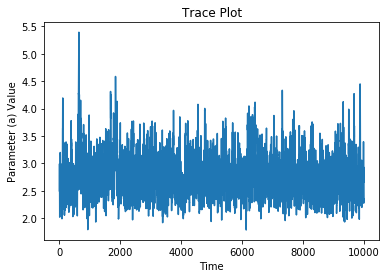

In [10]:
plt.plot(chain)
plt.title('Trace Plot')
plt.ylabel('Parameter (a) Value')
plt.xlabel('Time')
plt.show()

7) Plot a histogram and compare with P(a|x)

Let's give it a shot:


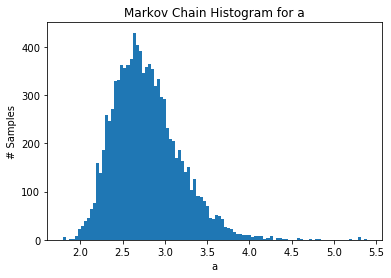

In [13]:
plt.hist(chain,100)
plt.xlabel('a')
plt.ylabel('# Samples')
plt.title('Markov Chain Histogram for a')
plt.show()


This is pretty much identical to $P(a|x)$ above. Notable features: probability increases around 2 (on this particular run), peaks at around e, and levels off around 4.5.